# Mac Address Analysis

The mac addresss can be used to understand the type of devices held by the customer. A csv was downloaded from the official IEEE website which contains a list of the first 6 letters of the mac address and the company which they are associated with.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

from msci.utils import utils, plot

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.simplefilter("ignore")

## Import data

In [4]:
signal_df = utils.import_signals('Mall of Mauritius', version=1)

In [5]:
mac_address_df = utils.import_mac_addresses()

In [6]:
signal_df['manufacturer'] = utils.add_manufacturer_to_signal(signal_df)

## Manufacturer Signals and Mac addressses

We will investigate how many signal and mac addresses the top 10 manufacturers have.

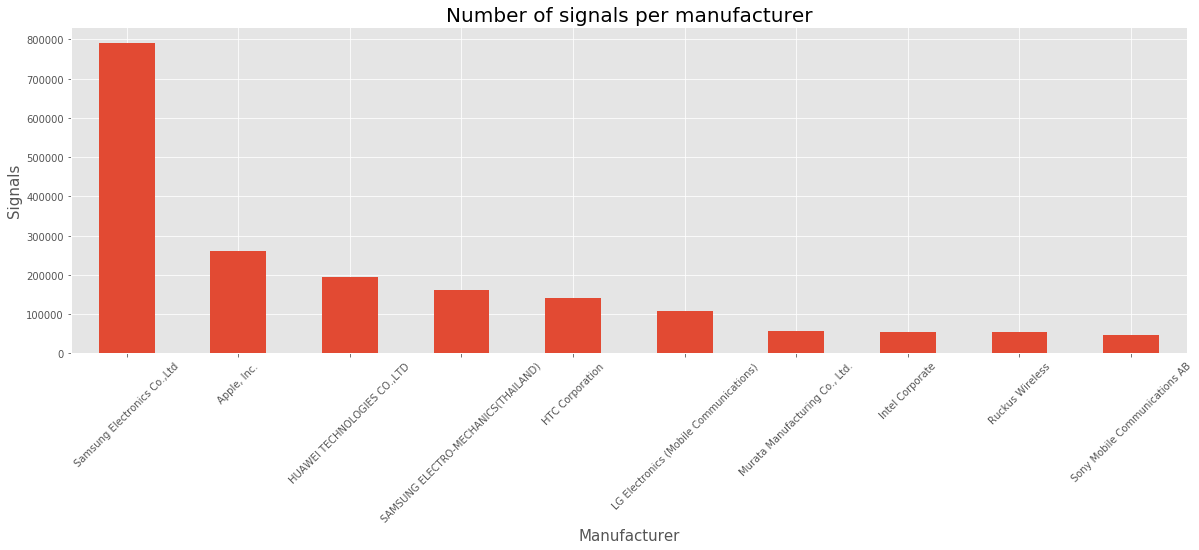

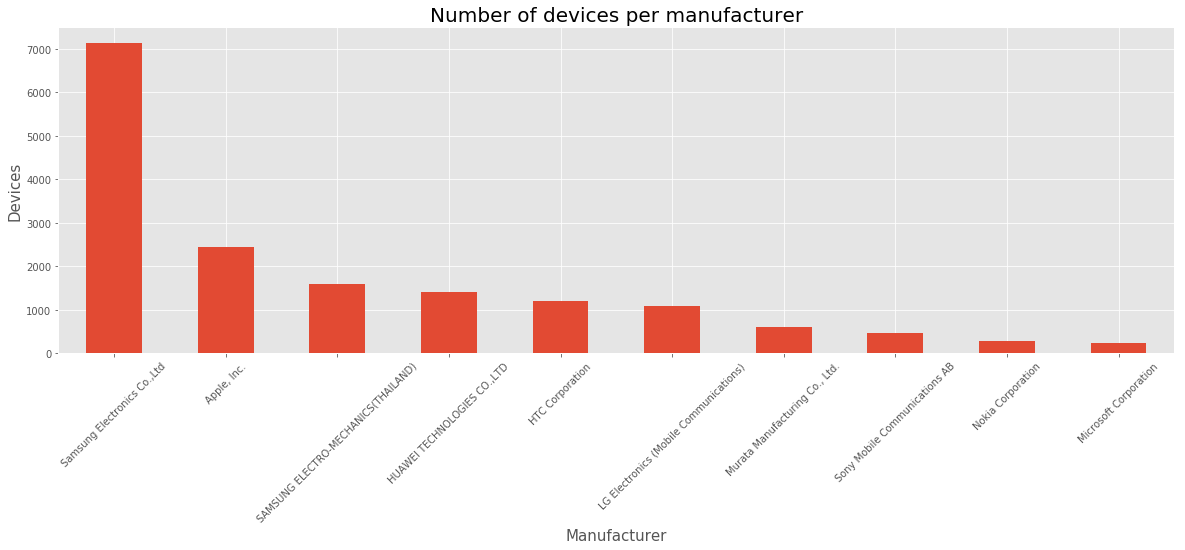

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))

ax = signal_df.manufacturer.value_counts()[0:10].plot.bar(ax=axes)
ax.set_title('Number of signals per manufacturer', fontsize=20)
ax.set_xlabel('Manufacturer', fontsize=15)
ax.set_ylabel('Signals', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))

ax = mac_address_df.manufacturer.value_counts()[0:10].plot.bar(ax=axes)
ax.set_title('Number of devices per manufacturer', fontsize=20)
ax.set_xlabel('Manufacturer', fontsize=15)
ax.set_ylabel('Devices', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

The signals and manufacturers are dominated by Samsung Electronics Co with Apple 1/3 of the count in second place.

## Number of mac addresses against time

This distribution shows how many devices were in the store throughout the day with each line showing the a different devices.

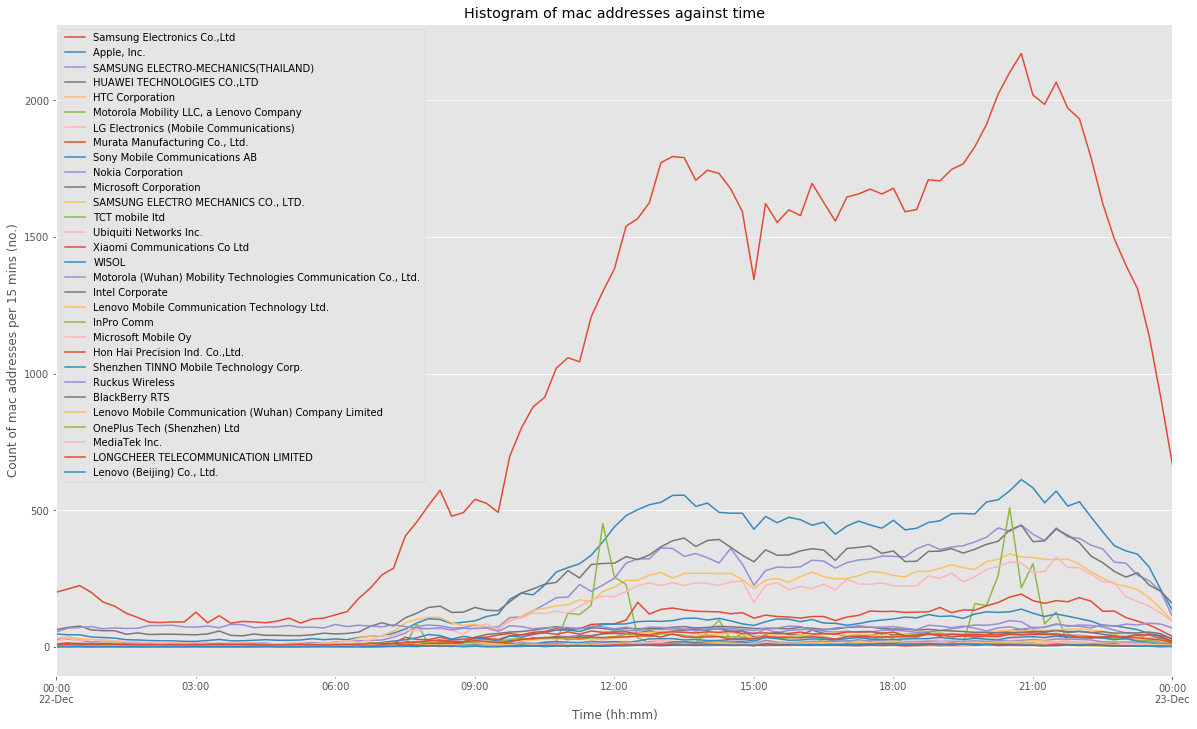

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

for company in signal_df.groupby('mac_address').head(1).manufacturer.value_counts()[:30].index:
    company_signal_df = signal_df[signal_df.manufacturer == company]
    plot.plot_histogram_jn(company_signal_df, axes=axes, label=company)

The graph shows that Samsung Electronics Co were the most prevelent devices throughout the data. The overall distribution of devices approximately shows the opening and closing hours of the store (opening at 8/9am and closing around 10/11pm). This is aligned to our understand of when the store opens and closes.

The distribution shows strange anomalies with motorola, giving huge peaks around 12:00 and 21:00, which are investigate below.

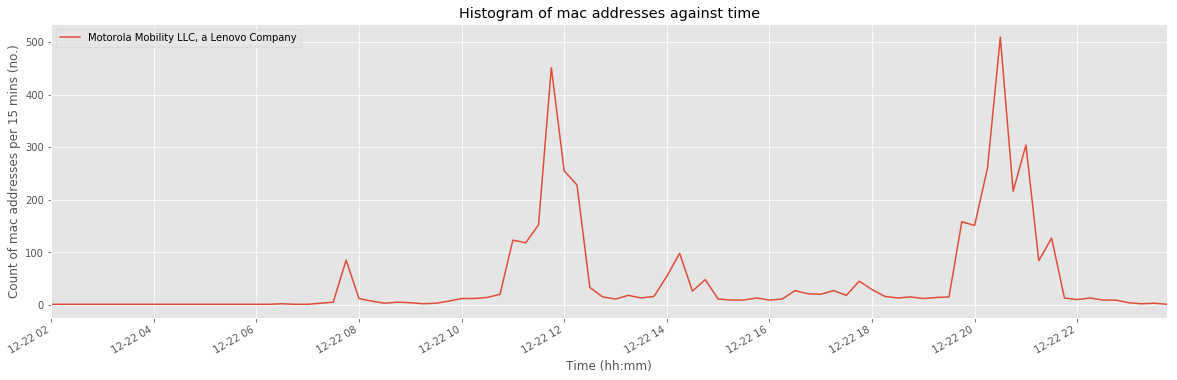

In [9]:
minute_resolution = '15'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
company = 'Motorola Mobility LLC, a Lenovo Company'
company_signal_df = signal_df[signal_df.manufacturer == company]
plot.plot_histogram_jn(company_signal_df, axes=axes, label=company)

We can see that the motoral mac addresses does not seem to be distributed typically. These peaks could be caused by the random mac addresses being given to few devices and these devices recieving and emitting signals very frequently.

In [10]:
# Remove mac addreses that have fewer than 100 signals

signal_clean_df = signal_df[
    signal_df.mac_address.isin(
        mac_address_df[mac_address_df.frequency > 100].mac_address.tolist()
    )
]

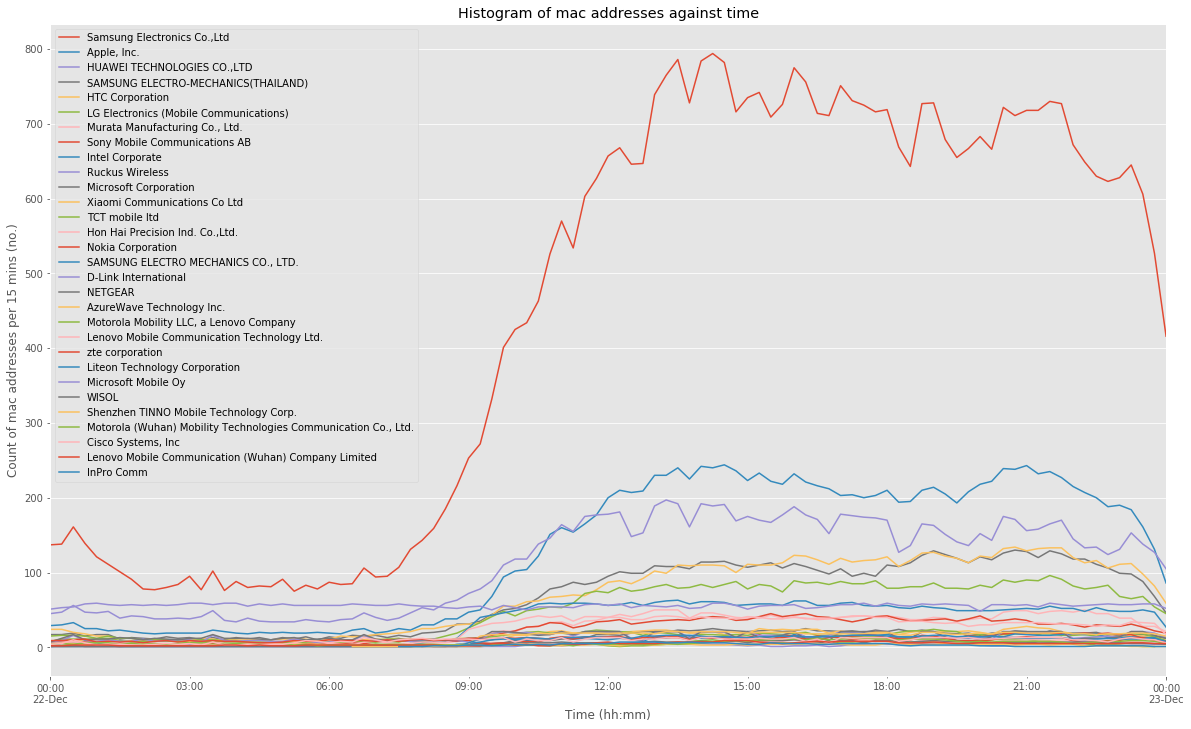

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

for company in signal_clean_df.groupby('mac_address').head(1).manufacturer.value_counts()[:30].index:
    company_signal_df = signal_clean_df[signal_clean_df.manufacturer == company]
    plot.plot_histogram_jn(company_signal_df, axes=axes, label=company)

After removing low count mac addresses, we can see that the presence of these miscellaneous peaks have disappeared.

## Location of the manufacturers

In [12]:
signal_df.manufacturer.value_counts()[:30]

Samsung Electronics Co.,Ltd                                       791155
Apple, Inc.                                                       261269
HUAWEI TECHNOLOGIES CO.,LTD                                       194784
SAMSUNG ELECTRO-MECHANICS(THAILAND)                               162656
HTC Corporation                                                   142012
LG Electronics (Mobile Communications)                            108320
Murata Manufacturing Co., Ltd.                                     56911
Intel Corporate                                                    54493
Ruckus Wireless                                                    53352
Sony Mobile Communications AB                                      47437
Hon Hai Precision Ind. Co.,Ltd.                                    35920
Xiaomi Communications Co Ltd                                       33643
TCT mobile ltd                                                     25138
Microsoft Corporation                              

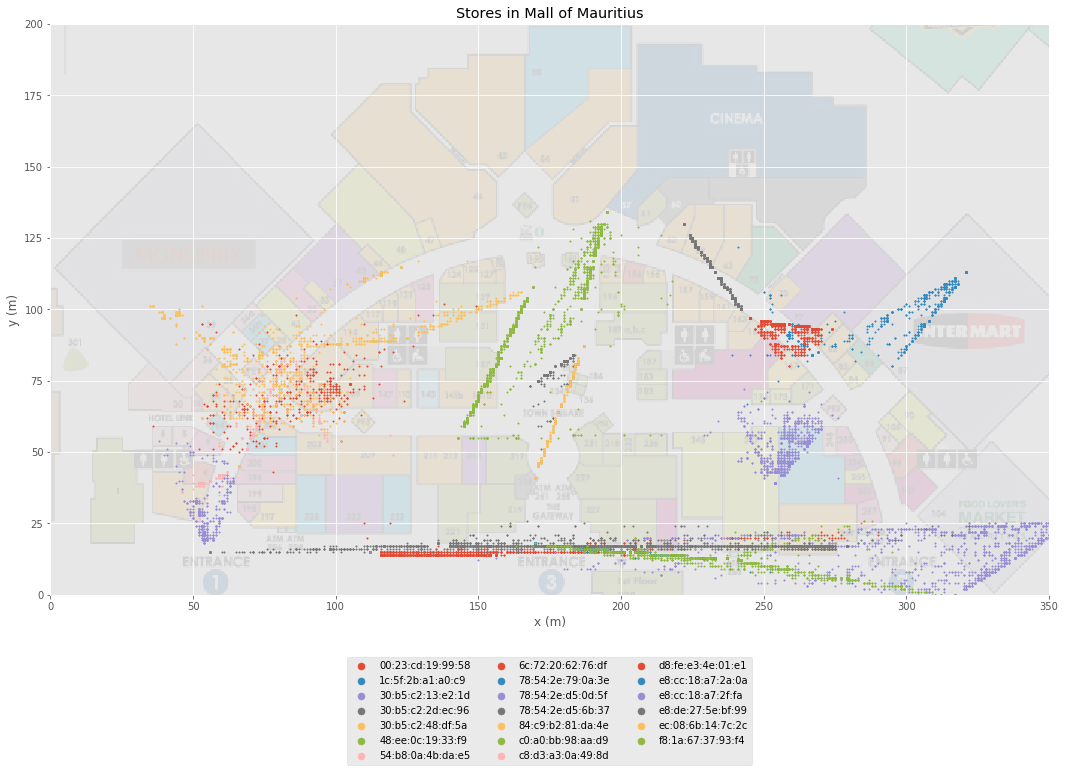

In [13]:
# manufacturer = 'Samsung Electronics Co.,Ltd'

# manufacturer = ['Intel Corporate']

# manufacturer = ['Ruckus Wireless']
# manufacturer = ['Raspberry Pi Foundation']
manufacturer = ['TP-LINK TECHNOLOGIES CO.,LTD.']
manufacturer += ['D-Link International']
# manufacturer = ['Aruba Networks']
# manufacturer = ['Chicony Electronics Co., Ltd.']

# manufacturer = ['AzureWave Technology Inc.']



fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
plot.plot_path_jn(signal_df, mac_address_df.mac_address[mac_address_df.manufacturer.isin(manufacturer)][:20], axes=axes, scatter=True)
fig.set_size_inches(20, 10.5)

d8:fe:e3:4e:01:e1


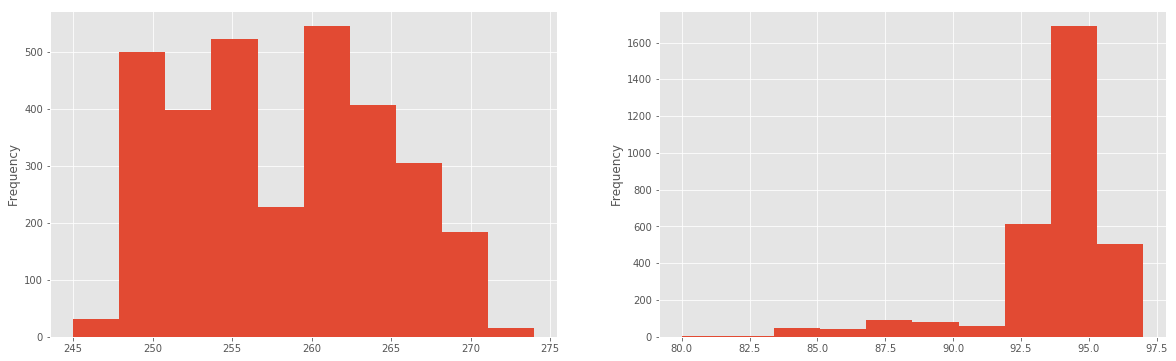

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
macs = mac_address_df.mac_address[mac_address_df.manufacturer.isin(manufacturer)].iloc[1]
signal = signal_df[signal_df.mac_address == macs]
signal.x.plot.hist(ax=ax1)
signal.y.plot.hist(ax=ax2)
print(macs)